In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import warnings 
warnings.filterwarnings("ignore")

# Data Ingestion

In [2]:
df = pd.read_csv("Customer-Churn.csv")
df.shape

(7043, 21)

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.drop('customerID',axis='columns',inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

# Data Cleaning

In [5]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [6]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [7]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
df.shape

(7043, 20)

In [9]:
df.iloc[488].TotalCharges

' '

In [10]:
df1 = df[df.TotalCharges!=' ']

In [11]:
df1.shape

(7032, 20)

In [12]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [13]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

In [14]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [15]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [16]:
df1[df1.Churn=='No']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
6,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
7,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,Female,0,No,No,72,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,No
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


Data visualization

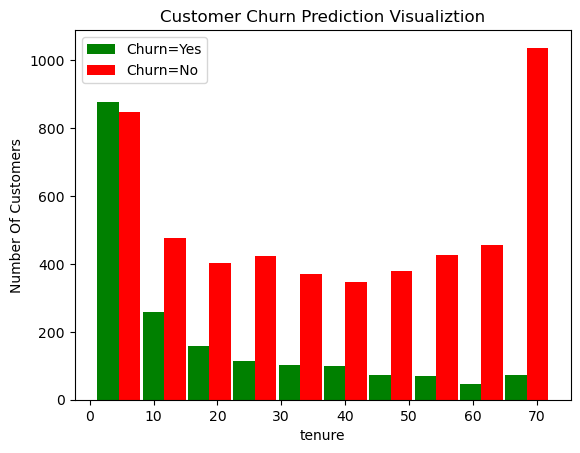

In [17]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

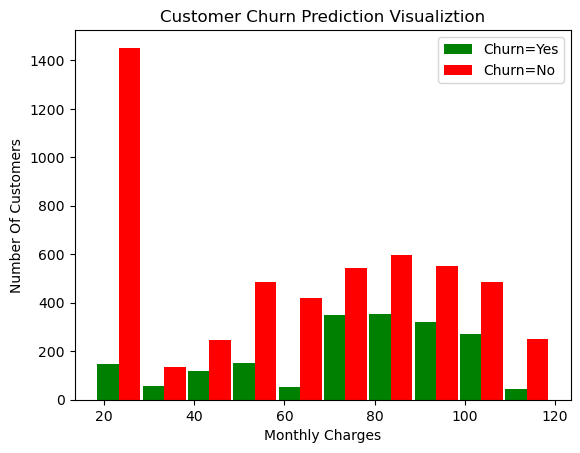

In [18]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [19]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes=='object':
            print(f'{column}: {df[column].unique()}') 

In [20]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [21]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [22]:
yes_no_columns = []
for column in df1:
    if df[column].dtypes=='object':
        yes_no_columns.append(str(column))
            
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

In [23]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [24]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [25]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [26]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 0]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


# One Hot Encoding

In [27]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_0', 'InternetService_DSL',
       'InternetService_Fiber optic', 'Contract_Month-to-month',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [28]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1375,1,0,1,1,39,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1439,1,1,0,0,5,1,0,0,0,1,...,0,0,1,1,0,0,0,1,0,0
1679,0,1,0,1,7,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,1
2165,1,0,0,0,13,1,0,0,0,0,...,1,0,0,0,1,0,0,0,0,1
272,0,0,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,1,0,0,0


In [29]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_0                            uint8
InternetService_DSL                          uint8
InternetService_Fiber optic    

In [30]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

df2[cols_to_scale] = sc.fit_transform(df2[cols_to_scale]) 

In [31]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [32]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_0,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
2969,1,0,1,1,0.901408,1,1,1,0,1,...,0,0,1,0,0,1,0,0,1,0
5103,1,0,1,1,0.380282,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
2009,0,0,1,1,0.971831,1,1,1,1,1,...,0,1,0,0,0,1,1,0,0,0
6136,1,0,1,1,0.633803,1,0,0,0,0,...,1,0,0,0,0,1,1,0,0,0
1358,0,0,0,0,0.126761,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,1


# Model Training

In [33]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)


In [34]:
X_train.shape

(5625, 26)

In [35]:
X_test.shape

(1407, 26)

In [36]:
len(X_train.columns)

26

In [37]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(26,input_shape=(26,),activation='relu'),
    keras.layers.Dense(15,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train,epochs=100)

Epoch 1/100
176/176 [==============================] - 4s 6ms/step - loss: 0.5324 - accuracy: 0.7216
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4412 - accuracy: 0.7879
Epoch 3/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4317 - accuracy: 0.7941
Epoch 4/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4268 - accuracy: 0.7984
Epoch 5/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4234 - accuracy: 0.7975
Epoch 6/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4216 - accuracy: 0.7993
Epoch 7/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4200 - accuracy: 0.7980
Epoch 8/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4181 - accuracy: 0.8005
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4159 - accuracy: 0.8069
Epoch 10/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4146 - accura

176/176 [==============================] - 1s 6ms/step - loss: 0.3695 - accuracy: 0.8251
Epoch 82/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3681 - accuracy: 0.8286
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3688 - accuracy: 0.8279
Epoch 84/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3687 - accuracy: 0.8265
Epoch 85/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3681 - accuracy: 0.8293
Epoch 86/100
176/176 [==============================] - 1s 6ms/step - loss: 0.3676 - accuracy: 0.8265
Epoch 87/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3673 - accuracy: 0.8286
Epoch 88/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3657 - accuracy: 0.8299
Epoch 89/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3677 - accuracy: 0.8293
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3653 - accuracy: 

In [38]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 1s 4ms/step - loss: 0.4211 - accuracy: 0.8003


[0.42112210392951965, 0.8002842664718628]

In [39]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 4ms/step


array([[0.00838939],
       [0.00241289],
       [0.06060377],
       [0.09303513],
       [0.00478049]], dtype=float32)

In [40]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [41]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0]

In [42]:
y_test[:10]

5401    0
1681    0
2076    0
3359    0
6629    0
149     0
1730    1
5971    0
3050    1
1183    0
Name: Churn, dtype: int64

In [43]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1046
           1       0.62      0.57      0.59       361

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.80      0.80      0.80      1407



Text(95.72222222222221, 0.5, 'Truth')

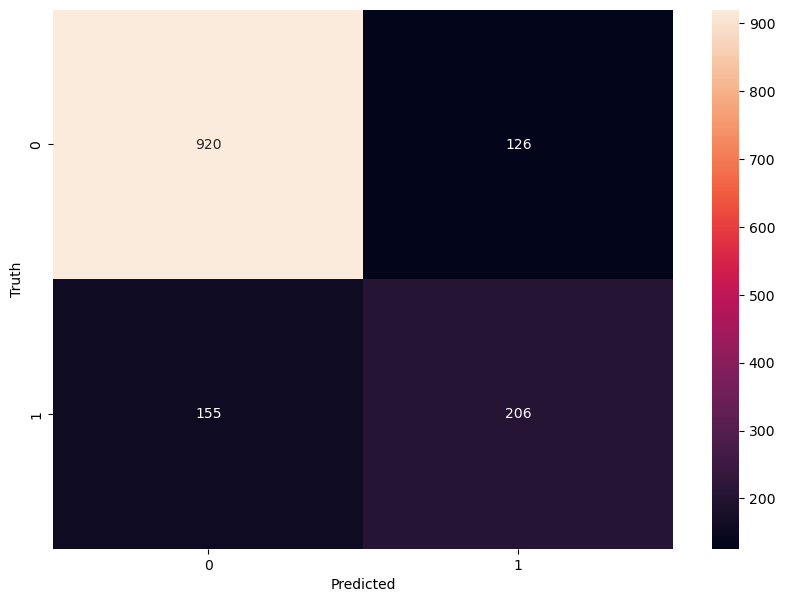

In [44]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Handling imbalanced data

we can see that the churn 1 is getting low F1 score, which means it clearly says that it has imbalanced data.

In [45]:
from tensorflow_addons import losses
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix , classification_report

In [46]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    model = keras.Sequential([
        keras.layers.Dense(26, input_dim=26, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
    
    if weights == -1:
        model.fit(X_train, y_train, epochs=100)
    else:
        model.fit(X_train, y_train, epochs=100, class_weight = weights)
    
    print(model.evaluate(X_test, y_test))
    
    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)
    
    print("Classification Report: \n", classification_report(y_test, y_preds))
    
    return y_preds

In [47]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 3s 5ms/step - loss: 0.5054 - accuracy: 0.7444
Epoch 2/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4343 - accuracy: 0.7924
Epoch 3/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4255 - accuracy: 0.7947
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4209 - accuracy: 0.8002
Epoch 5/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4187 - accuracy: 0.7986
Epoch 6/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4168 - accuracy: 0.8016
Epoch 7/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4171 - accuracy: 0.8053
Epoch 8/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4149 - accuracy: 0.8041
Epoch 9/100
176/176 [==============================] - 1s 5ms/step - loss: 0.4131 - accuracy: 0.8027
Epoch 10/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4117 - accura

176/176 [==============================] - 1s 3ms/step - loss: 0.3611 - accuracy: 0.8336
Epoch 82/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3612 - accuracy: 0.8331
Epoch 83/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3597 - accuracy: 0.8322
Epoch 84/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3588 - accuracy: 0.8348
Epoch 85/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3575 - accuracy: 0.8320
Epoch 86/100
176/176 [==============================] - 1s 5ms/step - loss: 0.3584 - accuracy: 0.8366
Epoch 87/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3579 - accuracy: 0.8357
Epoch 88/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3565 - accuracy: 0.8343
Epoch 89/100
176/176 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8336
Epoch 90/100
176/176 [==============================] - 1s 4ms/step - loss: 0.3557 - accuracy: 

# Method 1: Undersampling
reference: https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets

In [48]:
# Class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [49]:
# Undersample 0-class and concat the DataFrames of both class
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.Churn.value_counts())

Random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [50]:
X = df_test_under.drop('Churn',axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [51]:
# Number of classes in training Data
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [52]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 3s 4ms/step - loss: 0.6426 - accuracy: 0.6375
Epoch 2/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5317 - accuracy: 0.7388
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5088 - accuracy: 0.7562
Epoch 4/100
94/94 [==============================] - 1s 6ms/step - loss: 0.5005 - accuracy: 0.7592
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4959 - accuracy: 0.7595
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4913 - accuracy: 0.7595
Epoch 7/100
94/94 [==============================] - 1s 12ms/step - loss: 0.4888 - accuracy: 0.7622
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4859 - accuracy: 0.7622
Epoch 9/100
94/94 [==============================] - 1s 8ms/step - loss: 0.4845 - accuracy: 0.7635
Epoch 10/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4815 - accuracy: 0.7642
Epoch 11

94/94 [==============================] - 1s 7ms/step - loss: 0.4086 - accuracy: 0.8047
Epoch 83/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4084 - accuracy: 0.8067
Epoch 84/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4041 - accuracy: 0.8084
Epoch 85/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4025 - accuracy: 0.8140
Epoch 86/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4047 - accuracy: 0.8094
Epoch 87/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4029 - accuracy: 0.8090
Epoch 88/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4017 - accuracy: 0.8104
Epoch 89/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4015 - accuracy: 0.8127
Epoch 90/100
94/94 [==============================] - 1s 6ms/step - loss: 0.4011 - accuracy: 0.8094
Epoch 91/100
94/94 [==============================] - 1s 5ms/step - loss: 0.3994 - accuracy: 0.8084
Epoch 92/100


Check classification report above. f1-score for minority class 1 improved from <b>0.58 to 0.73.</b> Score for class 0 reduced to <b0.74 from 0.86 but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

# Method2: Oversampling

In [53]:
# Oversample 1-class and concat the DataFrames of both classes
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_test_over.Churn.value_counts())

Random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [54]:
X = df_test_over.drop('Churn',axis='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [55]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [56]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 5s 7ms/step - loss: 0.5404 - accuracy: 0.7349
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4859 - accuracy: 0.7662
Epoch 3/100
259/259 [==============================] - 2s 8ms/step - loss: 0.4782 - accuracy: 0.7697
Epoch 4/100
259/259 [==============================] - 3s 10ms/step - loss: 0.4724 - accuracy: 0.7737
Epoch 5/100
259/259 [==============================] - 2s 7ms/step - loss: 0.4683 - accuracy: 0.7745
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4646 - accuracy: 0.7764
Epoch 7/100
259/259 [==============================] - 2s 6ms/step - loss: 0.4609 - accuracy: 0.7781
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4576 - accuracy: 0.7798
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4544 - accuracy: 0.7828
Epoch 10/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4528 - accur

259/259 [==============================] - 1s 4ms/step - loss: 0.3682 - accuracy: 0.8373
Epoch 82/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3675 - accuracy: 0.8380
Epoch 83/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3682 - accuracy: 0.8381
Epoch 84/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3668 - accuracy: 0.8352
Epoch 85/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3658 - accuracy: 0.8370
Epoch 86/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3634 - accuracy: 0.8383
Epoch 87/100
259/259 [==============================] - 2s 6ms/step - loss: 0.3626 - accuracy: 0.8398
Epoch 88/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3625 - accuracy: 0.8396
Epoch 89/100
259/259 [==============================] - 1s 4ms/step - loss: 0.3632 - accuracy: 0.8373
Epoch 90/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3629 - accuracy: 

Check classification report above. f1-score for minority class 1 improved from <b>0.58 to 0.79.</b> Score for class 0 reduced to <b>0.76 from 0.86</b> but that's ok. We have more generalized classifier which classifies both classes with similar prediction score

# Method3: SMOTE

In [60]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [62]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [64]:
# Number of classes in training Data
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 4s 5ms/step - loss: 0.5446 - accuracy: 0.7278
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4774 - accuracy: 0.7701
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4668 - accuracy: 0.7747
Epoch 4/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4594 - accuracy: 0.7768
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4559 - accuracy: 0.7815
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4500 - accuracy: 0.7839
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4454 - accuracy: 0.7886
Epoch 8/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4420 - accuracy: 0.7893
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4385 - accuracy: 0.7930
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4343 - accura

154/259 [================>.............] - ETA: 0s - loss: 0.3482 - accuracy: 0.8529

SMOTE Oversampling increases f1 score of minority class 1 from <b>0.57 to 0.81</b> (huge improvement) Also over all accuracy improves from 0.78 to 0.80